In [26]:
import numpy as np 
import pandas as pd 
import os

import matplotlib.pyplot as plt
import seaborn as sns

In [27]:
df = pd.read_csv('./aug_train.csv')
df.head()

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
0,8949,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,NaN,NaN,1,36,1.0
1,29725,city_40,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15,50-99,Pvt Ltd,>4,47,0.0
2,11561,city_21,0.624,NaN,No relevent experience,Full time course,Graduate,STEM,5,NaN,NaN,never,83,0.0
3,33241,city_115,0.789,NaN,No relevent experience,NaN,Graduate,Business Degree,<1,NaN,Pvt Ltd,never,52,1.0
4,666,city_162,0.767,Male,Has relevent experience,no_enrollment,Masters,STEM,>20,50-99,Funded Startup,4,8,0.0


In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19158 entries, 0 to 19157
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   enrollee_id             19158 non-null  int64  
 1   city                    19158 non-null  object 
 2   city_development_index  19158 non-null  float64
 3   gender                  14650 non-null  object 
 4   relevent_experience     19158 non-null  object 
 5   enrolled_university     18772 non-null  object 
 6   education_level         18698 non-null  object 
 7   major_discipline        16345 non-null  object 
 8   experience              19093 non-null  object 
 9   company_size            13220 non-null  object 
 10  company_type            13018 non-null  object 
 11  last_new_job            18735 non-null  object 
 12  training_hours          19158 non-null  int64  
 13  target                  19158 non-null  float64
dtypes: float64(2), int64(2), object(10)
me

In [29]:
df.isna().sum()

enrollee_id                  0
city                         0
city_development_index       0
gender                    4508
relevent_experience          0
enrolled_university        386
education_level            460
major_discipline          2813
experience                  65
company_size              5938
company_type              6140
last_new_job               423
training_hours               0
target                       0
dtype: int64

<Axes: >

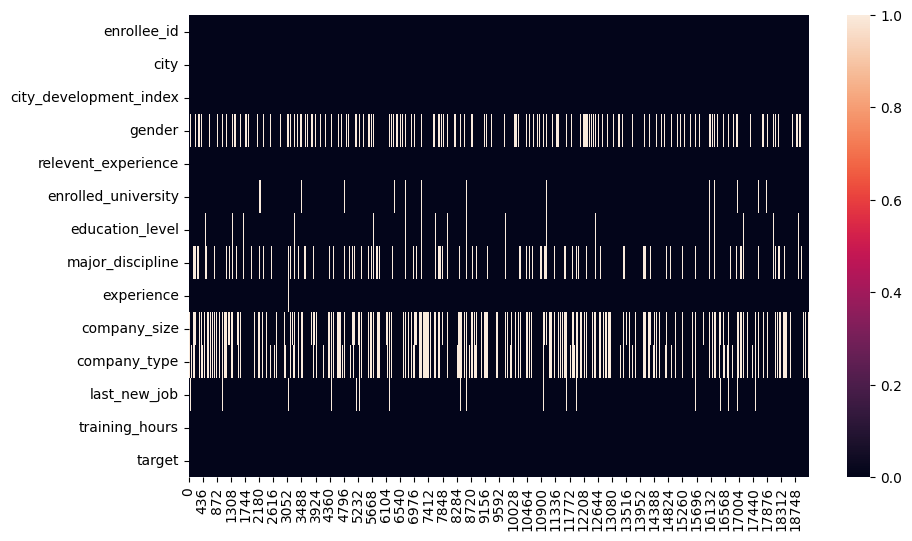

In [30]:
plt.figure(figsize=(10, 6))
sns.heatmap(df.isna().transpose())

In [31]:
df = df.drop('enrollee_id', axis=1)

In [32]:
for col in df.columns:
    print(f'{col}:{df[col].isna().sum()/df.shape[0]*100}%')

city:0.0%
city_development_index:0.0%
gender:23.530639941538784%
relevent_experience:0.0%
enrolled_university:2.0148240943731075%
education_level:2.401085708320284%
major_discipline:14.68316108153252%
experience:0.33928385008873574%
company_size:30.994884643490973%
company_type:32.04927445453596%
last_new_job:2.207954901346696%
training_hours:0.0%
target:0.0%


In [33]:
df.shape

(19158, 13)

In [34]:
tmp = df.dropna(thresh=9, axis=0)
tmp.shape

(18908, 13)

In [35]:
df['city'] = df['city'].str.extract(r'(\d+)')

<Axes: >

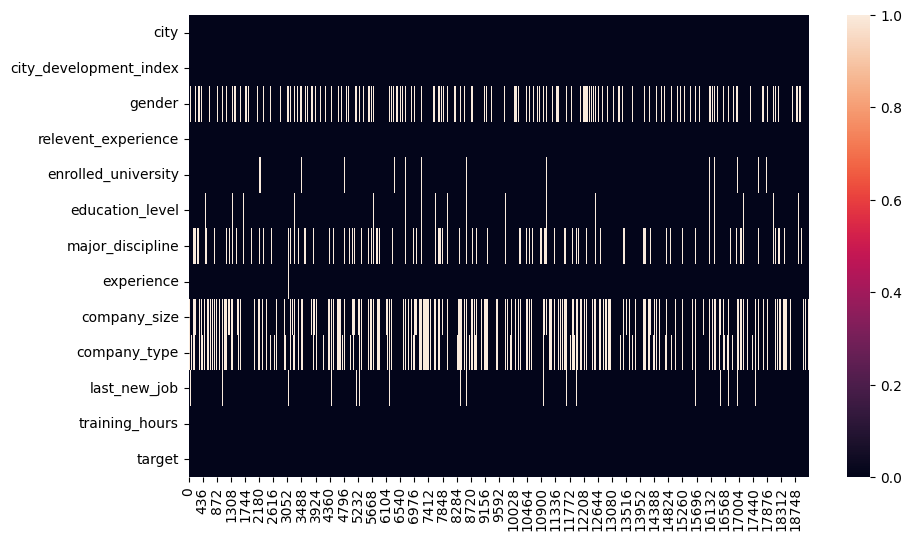

In [36]:
plt.figure(figsize=(10, 6))
sns.heatmap(df.isna().transpose())

In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19158 entries, 0 to 19157
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   city                    19158 non-null  object 
 1   city_development_index  19158 non-null  float64
 2   gender                  14650 non-null  object 
 3   relevent_experience     19158 non-null  object 
 4   enrolled_university     18772 non-null  object 
 5   education_level         18698 non-null  object 
 6   major_discipline        16345 non-null  object 
 7   experience              19093 non-null  object 
 8   company_size            13220 non-null  object 
 9   company_type            13018 non-null  object 
 10  last_new_job            18735 non-null  object 
 11  training_hours          19158 non-null  int64  
 12  target                  19158 non-null  float64
dtypes: float64(2), int64(1), object(10)
memory usage: 1.9+ MB


In [38]:
object_columns = df.select_dtypes(include=['object'])
columns_with_nan = object_columns.columns[object_columns.isnull().any()]

for col in columns_with_nan:
    mode_value = df[col].mode()[0]
    df[col] = df[col].fillna(mode_value)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19158 entries, 0 to 19157
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   city                    19158 non-null  object 
 1   city_development_index  19158 non-null  float64
 2   gender                  19158 non-null  object 
 3   relevent_experience     19158 non-null  object 
 4   enrolled_university     19158 non-null  object 
 5   education_level         19158 non-null  object 
 6   major_discipline        19158 non-null  object 
 7   experience              19158 non-null  object 
 8   company_size            19158 non-null  object 
 9   company_type            19158 non-null  object 
 10  last_new_job            19158 non-null  object 
 11  training_hours          19158 non-null  int64  
 12  target                  19158 non-null  float64
dtypes: float64(2), int64(1), object(10)
memory usage: 1.9+ MB


<Axes: >

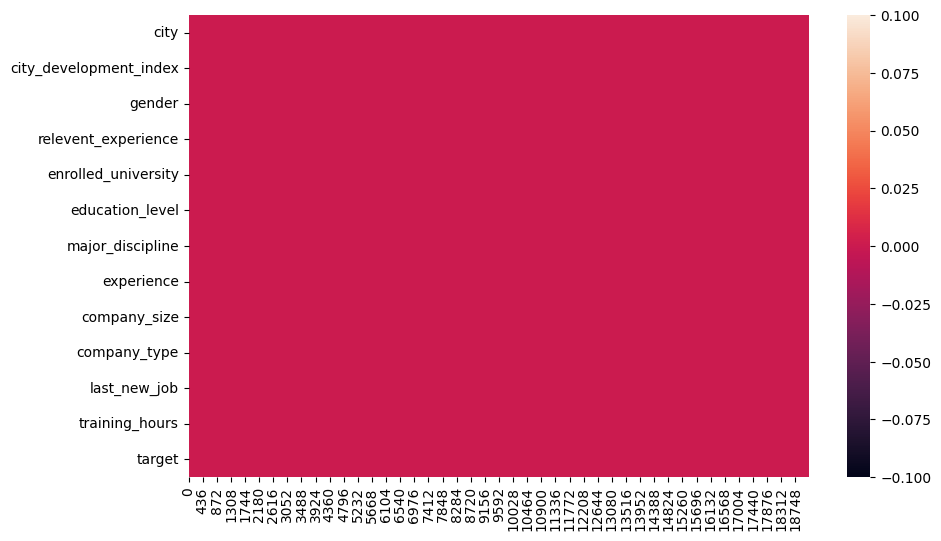

In [39]:
plt.figure(figsize=(10, 6))
sns.heatmap(df.isna().transpose())

In [40]:
df.head()

,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
0,103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,50-99,Pvt Ltd,1,36,1.0
1,40,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15,50-99,Pvt Ltd,>4,47,0.0
2,21,0.624,Male,No relevent experience,Full time course,Graduate,STEM,5,50-99,Pvt Ltd,never,83,0.0
3,115,0.789,Male,No relevent experience,no_enrollment,Graduate,Business Degree,<1,50-99,Pvt Ltd,never,52,1.0
4,162,0.767,Male,Has relevent experience,no_enrollment,Masters,STEM,>20,50-99,Funded Startup,4,8,0.0


In [41]:
from catboost import CatBoostClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

X = df.drop('target', axis=1)
y = df['target']  

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
categorical_features = [col for col in X.columns if X[col].dtype == 'object']

model = CatBoostClassifier(
    iterations=8000,           
    learning_rate=0.01,         
    depth=8,                  
    cat_features=categorical_features,
    verbose=500,               
    eval_metric='Accuracy'     
)

model.fit(X_train, y_train, eval_set=(X_test, y_test))


0:	learn: 0.7748923	test: 0.7659186	best: 0.7659186 (0)	total: 13.9ms	remaining: 1m 51s
500:	learn: 0.7991648	test: 0.7802714	best: 0.7805324 (474)	total: 6.04s	remaining: 1m 30s
1000:	learn: 0.8116273	test: 0.7787056	best: 0.7805324 (474)	total: 12.5s	remaining: 1m 27s
1500:	learn: 0.8232416	test: 0.7779228	best: 0.7805324 (474)	total: 19.2s	remaining: 1m 23s
2000:	learn: 0.8367480	test: 0.7805324	best: 0.7807933 (1957)	total: 25.9s	remaining: 1m 17s
2500:	learn: 0.8473183	test: 0.7810543	best: 0.7818372 (2447)	total: 32.7s	remaining: 1m 12s
3000:	learn: 0.8567793	test: 0.7820981	best: 0.7826200 (2987)	total: 39.8s	remaining: 1m 6s
3500:	learn: 0.8667624	test: 0.7802714	best: 0.7826200 (2987)	total: 46.8s	remaining: 1m
4000:	learn: 0.8768759	test: 0.7802714	best: 0.7826200 (2987)	total: 53.5s	remaining: 53.4s
4500:	learn: 0.8843142	test: 0.7800104	best: 0.7826200 (2987)	total: 1m	remaining: 47s
5000:	learn: 0.8920136	test: 0.7779228	best: 0.7826200 (2987)	total: 1m 7s	remaining: 40.5s

In [42]:
y_pred = model.predict(X_test)
f"Accuracy: {accuracy_score(y_test, y_pred)}"

'Accuracy: 0.7826200417536534'